# Airbnb  Dataset - Data Cleaning

Airbnb is a company known worldwide for its innovation in terms of quick and practical rental of homes, spaces during travel. However, the entire property registration stage or property evaluation by users is done freely and therefore, some data may be missing or badly formatted. That said,  the dataset for practice data cleaning

[New York City Airbnb Open Data](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) 

![img](https://www.vidadeturista.com/wp-content/uploads/2020/01/mapa-de-nova-york-5.gif)

[Airbnb Open Data](http://insideairbnb.com/get-the-data/).


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/Airbnb.csv')

## 1 -How many columns have at least one null value?

In [10]:
#Resposta: 4 colunas
df.isnull().sum().sort_values()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
name                                 16
host_name                            21
last_review                       10052
reviews_per_month                 10052
dtype: int64

## 2 - If there is a column of type Date with wrong formatting, fix that column.

In [11]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [12]:
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

## 3 - Check the percentage of null data per column. For columns with less than 1%, exclude those records where it has a null value.

In [13]:
df.isnull().sum()/df.shape[0]*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [14]:
df.dropna(subset=['name','host_name'],axis=0,inplace=True)

df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## 4 - Note that there are missing values in cases of properties that have not received any reviews. In this case, the columns last_review and reviews_per_month were null. Only fill the reviews_per_month column with 0 (because there are no reviews per month).

In [15]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

df.isnull().sum()


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#  outliers

## 5 - One of the cleaning steps is to find outliers. One way to do this is through Boxplot. Create a boxplot and combine the overall price Outliers and another outlier grouping by room_type.

<AxesSubplot: xlabel='price'>

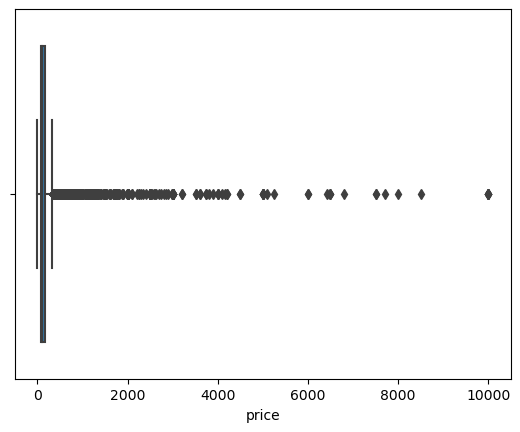

In [16]:
sns.boxplot(data=df,x = 'price')

<AxesSubplot: xlabel='room_type', ylabel='price'>

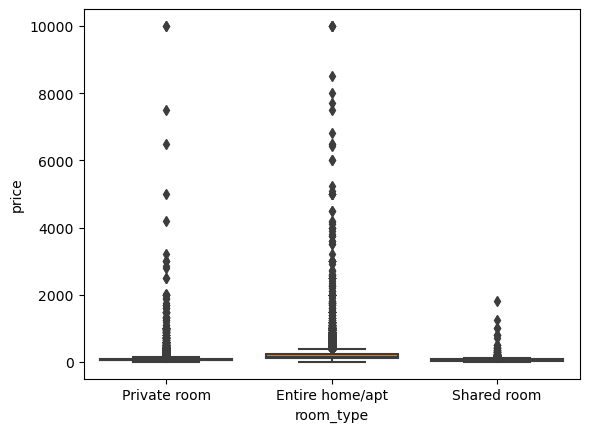

In [22]:
sns.boxplot(data=df,x = 'room_type', y = 'price')

## 6 - The two graphs above show a bad visualization of the facts, that is, there are many outliers. Let's reproduce the analysis above after applying 2 different techniques for removing outliers. Create a new DataFrame and apply the IQR technique - [Interquartile Range](https://builtin.com/data-science/how-to-find-outliers-with-iqr) on the price variable. Play the graphs from the previous exercise.

<AxesSubplot: xlabel='price'>

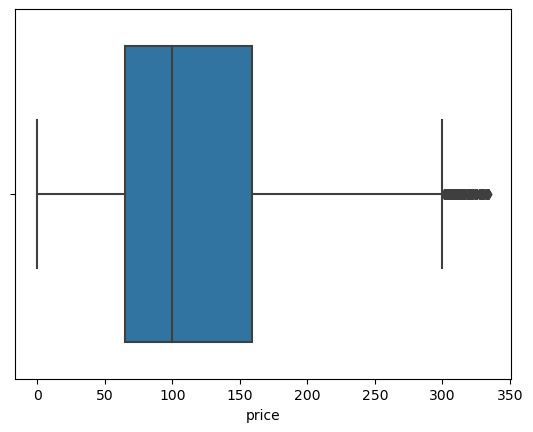

In [23]:
price = df['price']

Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_iqr = df[(lower_bound <= df.price) & (df.price <= upper_bound)]
sns.boxplot(data=df_iqr,x = 'price')

<AxesSubplot: xlabel='room_type', ylabel='price'>

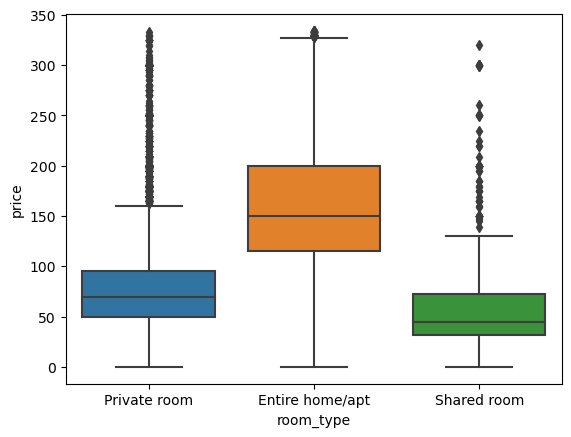

In [24]:
sns.boxplot(data=df_iqr,x = 'room_type', y = 'price')

## 7 -Unfortunately, even after applying the IQR, the data still have some outliers. Let's apply a second technique, based on the adjusted dataset. Applying the percentile concept, filter the dataset again to select the data that are among the 95%. Play the graphics

<AxesSubplot: xlabel='price'>

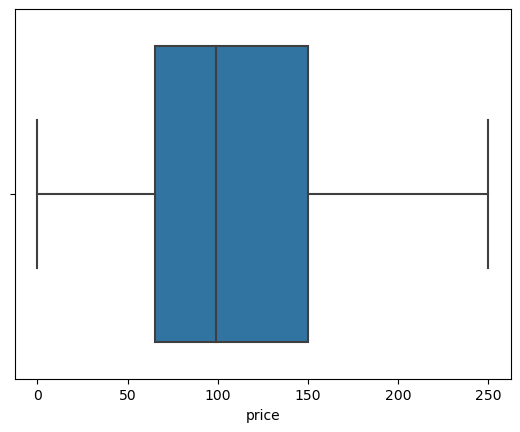

In [25]:
df_99 = df_iqr[df_iqr.price <= df_iqr.price.quantile(0.95)]
sns.boxplot(data=df_99,x = 'price')

<AxesSubplot: xlabel='room_type', ylabel='price'>

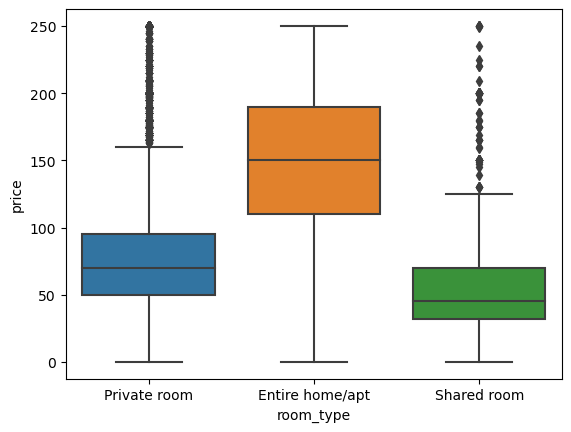

In [26]:
sns.boxplot(data=df_99,x = 'room_type', y = 'price')

## 8 - If we look at a new dataset, how many records have the same name (registered property name).

In [27]:
sum(df_99.name.value_counts() > 1)

587

## 9 - Let's assume that this data with duplicate name is wrong or not updated data. Filter (delete these lines) with the repeated name, keeping only 1 data with the most recent last_review.

In [28]:
df_filtered = df_99.sort_values(by='last_review',ascending=False).reset_index(drop=True).drop_duplicates(subset='name')
df_filtered


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.00,1,1
1,22340384,Great Place! Great Space! Welcome 2 My BK Place!,18049970,Lou,Brooklyn,Brownsville,40.65948,-73.90084,Entire home/apt,175,3,56,2019-07-08,3.00,2,288
2,23858270,Renovated Studio Apt! Walk to the Subway & Ferry!,18768995,MJ & Al,Brooklyn,Bay Ridge,40.62989,-74.02345,Private room,90,3,34,2019-07-08,2.24,1,231
3,35945823,PLUSH RENOVATED APARTMENT CLOSE TO MANHATTAN!,269818817,Mark,Queens,Ridgewood,40.70320,-73.89571,Entire home/apt,220,4,2,2019-07-08,2.00,2,146
4,24391756,Sunny Apartment in Park Slope,20813915,Kimberly,Brooklyn,South Slope,40.66409,-73.99090,Entire home/apt,145,1,90,2019-07-08,5.97,1,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43648,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9
43649,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36
43650,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27
43651,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2


## 10 - Observe the figure below, using the data provided. Create a chart that represents the properties in each group and the configuration looks like the image below. Tip: relate geographic variables and neighborhood groupings. For this, use the dataset resulting from the previous question.
![img](https://www.vidadeturista.com/wp-content/uploads/2020/01/mapa-de-nova-york-5.gif)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

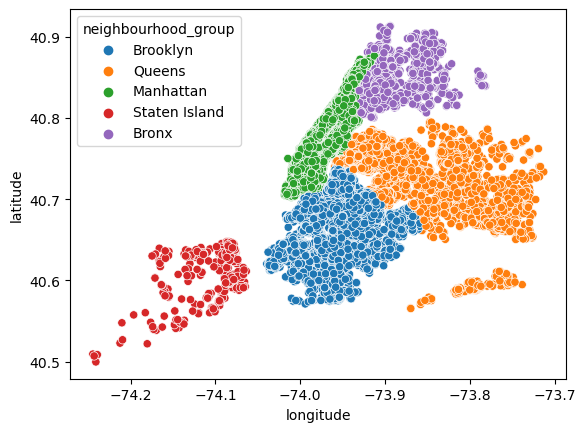

In [29]:
sns.scatterplot(data=df_filtered,x='longitude',y='latitude',hue='neighbourhood_group')